<a href="https://colab.research.google.com/github/xslipstream/course-v3/blob/master/Question_on_LR_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
data = ImageDataBunch.from_name_re(path_img, filenames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
# Try using resnet50
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


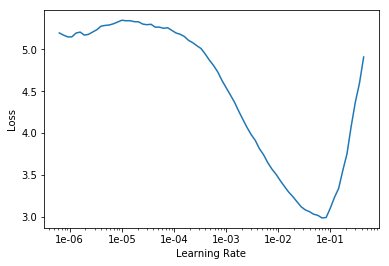

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.733227,0.295890,0.104871,03:11
1,0.584867,0.243431,0.079838,03:12
2,0.403213,0.274884,0.084574,03:12
3,0.350414,0.239174,0.073072,03:13
4,0.224792,0.192620,0.061570,03:13
5,0.179458,0.198909,0.062246,03:13
6,0.125654,0.155275,0.047361,03:12
7,0.114076,0.151692,0.046685,03:11


In [0]:
learn.save('stage-1-50v1')

# **Fine-tune Attempt #1: Deepest Slope**
le-4 to le-2 appears to have the deepest decreasing slope but results are bad

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.191333,2.231566,0.529770,04:15
1,1.063339,0.589217,0.177943,04:11
2,0.464685,0.292842,0.101489,04:11


# **Fine-Tune Attempt 2**
Followed the course’s lr.  Best results in all 3 cycles.

In [0]:
learn.load('stage-1-50v1')
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.106489,0.152496,0.048714,04:11
1,0.102569,0.154926,0.047361,04:12
2,0.085976,0.148733,0.048714,04:12


# **Fine-Tune Attempt 3**
Tried to increase the end LR to le-3.  Although the final result is just as good as attempt #2, why is cycle #1 worst?  How should I be selecting learning rates for best results?

In [0]:
learn.load('stage-1-50v1');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.177483,0.231494,0.065629,04:10
1,0.141378,0.166195,0.045332,04:11
2,0.087983,0.160209,0.048714,04:11
